# **Emission de CO2 par les véhicules - Classification Modelisation ML**

## 0. Import des modules et sous modules

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.api
import random
from scipy.stats import randint
from sklearn import metrics
import itertools

In [165]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures, label_binarize
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance

from sklearn.metrics import roc_curve, auc

from plotly.subplots import make_subplots
from sklearn import preprocessing

In [167]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, confusion_matrix, classification_report, r2_score, mean_squared_error, roc_curve, auc, roc_auc_score

## 1. Import du DataSet et visualisation

In [170]:
data_final = pd.set_option('display.max_row', 111)
data_final = pd.set_option('display.max_column', 111)

In [172]:
data_final = pd.read_csv('df_final.csv')
df_final = data_final.copy()

In [173]:
df_final.head()

,Class_CO2,PuissanceMaximale_kW,masseVideEuroMax_kg,CO2_g_par_km,Marque_ALFA-ROMEO,Marque_ASTON MARTIN,Marque_AUDI,Marque_BENTLEY,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,Marque_DACIA,Marque_DANGEL,Marque_FERRARI,Marque_FIAT,Marque_FORD,Marque_HONDA,Marque_HYUNDAI,Marque_INFINITI,Marque_JAGUAR,Marque_JAGUAR LAND ROVER LIMITED,Marque_JEEP,Marque_KIA,Marque_LADA,Marque_LAMBORGHINI,Marque_LANCIA,Marque_LAND ROVER,Marque_LEXUS,Marque_LOTUS,Marque_MASERATI,Marque_MAYBACH,Marque_MAZDA,Marque_MERCEDES,Marque_MERCEDES AMG,Marque_MERCEDES-BENZ,Marque_MINI,Marque_MITSUBISHI,Marque_NISSAN,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_QUATTRO,Marque_RENAULT,Marque_RENAULT TECH,Marque_ROLLS-ROYCE,Marque_SEAT,Marque_SKODA,Marque_SMART,Marque_SSANGYONG,Marque_SUBARU,Marque_SUZUKI,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO,Carburant_C_autre,Carburant_ES,Carburant_GO,Hybride_non,Hybride_oui,BoîteDeVitesse_Auto,BoîteDeVitesse_BV_autre,BoîteDeVitesse_M,Carrosserie_BERLINE,Carrosserie_BREAK,Carrosserie_CABRIOLET,Carrosserie_COMBISPACE,Carrosserie_COUPE,Carrosserie_MINIBUS,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INF,gamme_MOY-SUPER,gamme_SUPERIEURE
0,E,0.544329,-1.809856,182.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,C,0.071365,-1.667545,136.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,C,-0.466095,-1.667545,134.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,C,-0.466095,-1.667545,134.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,C,0.071365,-1.667545,139.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [175]:
df_final = df_final.drop('CO2_g_par_km', axis = 1) # suppression de la variable cible "Class_CO2" destinée à la classification

In [178]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98454 entries, 0 to 98453
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Class_CO2                         98454 non-null  object 
 1   PuissanceMaximale_kW              98454 non-null  float64
 2   masseVideEuroMax_kg               98454 non-null  float64
 3   Marque_ALFA-ROMEO                 98454 non-null  bool   
 4   Marque_ASTON MARTIN               98454 non-null  bool   
 5   Marque_AUDI                       98454 non-null  bool   
 6   Marque_BENTLEY                    98454 non-null  bool   
 7   Marque_BMW                        98454 non-null  bool   
 8   Marque_CADILLAC                   98454 non-null  bool   
 9   Marque_CHEVROLET                  98454 non-null  bool   
 10  Marque_CITROEN                    98454 non-null  bool   
 11  Marque_DACIA                      98454 non-null  bool   
 12  Marq

## 2. Encodage et mise en forme du dataset

### 2.1 Decoupage du dataset

In [182]:
# variables cible
df_cible = df_final["Class_CO2"]
# Variables explicative
df_explicative = df_final.drop("Class_CO2", axis = 1)

### 2.2 Encodage de la variable cible

In [185]:
encoder = LabelEncoder()
df_cible = encoder.fit_transform(df_cible)
classes=encoder.classes_

### 2.3 Concatenation

In [188]:
df_final = pd.concat([pd.DataFrame(df_cible, columns=["Class_CO2"]), df_explicative], axis = 1)
df_final.head(10)

,Class_CO2,PuissanceMaximale_kW,masseVideEuroMax_kg,Marque_ALFA-ROMEO,Marque_ASTON MARTIN,Marque_AUDI,Marque_BENTLEY,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,Marque_DACIA,Marque_DANGEL,Marque_FERRARI,Marque_FIAT,Marque_FORD,Marque_HONDA,Marque_HYUNDAI,Marque_INFINITI,Marque_JAGUAR,Marque_JAGUAR LAND ROVER LIMITED,Marque_JEEP,Marque_KIA,Marque_LADA,Marque_LAMBORGHINI,Marque_LANCIA,Marque_LAND ROVER,Marque_LEXUS,Marque_LOTUS,Marque_MASERATI,Marque_MAYBACH,Marque_MAZDA,Marque_MERCEDES,Marque_MERCEDES AMG,Marque_MERCEDES-BENZ,Marque_MINI,Marque_MITSUBISHI,Marque_NISSAN,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_QUATTRO,Marque_RENAULT,Marque_RENAULT TECH,Marque_ROLLS-ROYCE,Marque_SEAT,Marque_SKODA,Marque_SMART,Marque_SSANGYONG,Marque_SUBARU,Marque_SUZUKI,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO,Carburant_C_autre,Carburant_ES,Carburant_GO,Hybride_non,Hybride_oui,BoîteDeVitesse_Auto,BoîteDeVitesse_BV_autre,BoîteDeVitesse_M,Carrosserie_BERLINE,Carrosserie_BREAK,Carrosserie_CABRIOLET,Carrosserie_COMBISPACE,Carrosserie_COUPE,Carrosserie_MINIBUS,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INF,gamme_MOY-SUPER,gamme_SUPERIEURE
0,4,0.544329,-1.809856,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2,0.071365,-1.667545,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2,-0.466095,-1.667545,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,2,-0.466095,-1.667545,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,2,0.071365,-1.667545,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,2,0.071365,-1.667545,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,Fa

## 3. TrainTest 

In [191]:
# Créons un objet y contenant la variable cible CO2_g_par_km et un object X contenant le reste des variables
X = df_final.drop('Class_CO2', axis=1)
y = df_final['Class_CO2']

In [193]:
# Séparons les données en un ensemble d'apprentissage (X_train, y_train) et un ensemble de test (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
y_train.value_counts()

Class_CO2
5    41676
4    22810
2     4486
3     3781
6     3339
1     2142
0      529
Name: count, dtype: int64

In [197]:
y_test.value_counts()

Class_CO2
5    10483
4     5584
2     1113
3      990
6      848
1      550
0      123
Name: count, dtype: int64

## 4. Modelisation

##### Dans cette partie, il s'agit de dévélopper un modèle de ML en entrainant tout plein de modèles différents et dans le but de voir celui ou ceux qui auront une meilleure performance. Ensuite il s'agira  d'ameliorer la performance de ces modèles en optimisant leurs hyperparametres grace à un série de plusieurs algorithmes << RandomizedSearchCV >>. Nous utiliserons également les techniques d'ensemble learning pour tenter d'ameliorer également la performance des modèles qui auront un bon score lors de l'entrainement. Pour faire tout çà, nous utiliserons le score comme métric. La matrice de confusion, le rapport de classification et les courbes ROC nous permettrons d'évaluer également nos modèles.

### 4.1 Fonction d'evaluation

In [201]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)
    y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
    
    print("---------------Score train et test -----------------------")
    
    print('score train:', model.score(X_train, y_train))
    print('score test:', model.score(X_test, y_test))
    
    print("-------------Matrice de confusion--------------------------")
    
    #print(confusion_matrix(y_test, ypred))

    cnf_matrix = metrics.confusion_matrix(y_test, ypred)
    print(cnf_matrix)

    classe = range(0,6)

    plt.figure()

    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classe))
    plt.xticks(tick_marks, classe)
    plt.yticks(tick_marks, classe)

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()
    
    print("---------------Rapport de classification--------------------")
    

    print(classification_report(y_test, ypred))
    
    
    print("---------------Courbe ROC multiclasse--------------------")
    
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()
    n_class = classes.shape[0]
    #n_class = 6
    
    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], linestyle='--',label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
    
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    
    #print("---------------Cacul de l'air moyen--------------------")
     
    #roc_auc_score(y_test, pred_prob, multi_class = "ovr")
      

### 4.2 Instanciation des modèles

In [204]:
LogisticRegression = LogisticRegression(random_state=0)
RandomForest = RandomForestClassifier(random_state=0) 
DecisionTreeClassifier = DecisionTreeClassifier(random_state=0)
AdaBoost = AdaBoostClassifier(random_state=0) 
KNeighborsClassifier = KNeighborsClassifier() 
MLPClassifier = MLPClassifier(random_state=1)

In [208]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost': AdaBoost,
                  'DecisionTreeClassifier': DecisionTreeClassifier,
                  'KNeighborsClassifier': KNeighborsClassifier,
                  'MLPClassifier': MLPClassifier,
                  'LogisticRegression' : LogisticRegression
                 }

### 4.3 Evaluation des modèles

##### Après entrainement de plusieurs modèles on constate que les modèles RandomForest, DecisionTreeClassifier et KNeighborsClassifier présentent des scores bien meilleurs que les autres modèles avec respectivement (84.40%, 80.75%); (84.40%, 80.39%) et (80.6%, 78.39%) sur les echantillons d'entrainement et de test.

RandomForest
---------------Score train et test -----------------------
score train: 0.8440638370808629
score test: 0.8075770656645168
-------------Matrice de confusion--------------------------
[[  66   45   10    2    0    0    0]
 [  31  393  102   21    3    0    0]
 [   4  107  834  138   27    3    0]
 [   4   27  180  658  113    7    1]
 [   1    4   14  126 4259 1173    7]
 [   0    0    3    5 1428 9020   27]
 [   0    0    0    0    9  167  672]]


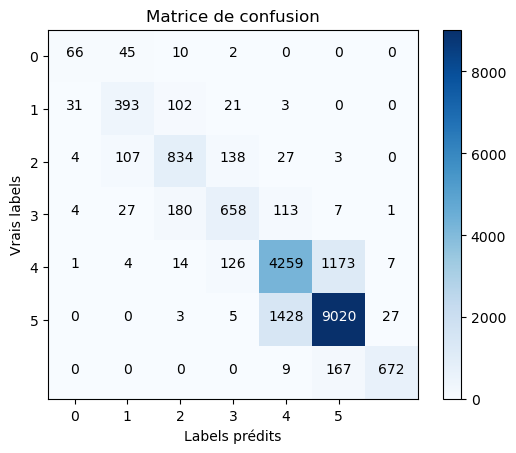

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.62      0.54      0.58       123
           1       0.68      0.71      0.70       550
           2       0.73      0.75      0.74      1113
           3       0.69      0.66      0.68       990
           4       0.73      0.76      0.75      5584
           5       0.87      0.86      0.87     10483
           6       0.95      0.79      0.86       848

    accuracy                           0.81     19691
   macro avg       0.75      0.73      0.74     19691
weighted avg       0.81      0.81      0.81     19691

---------------Courbe ROC multiclasse--------------------


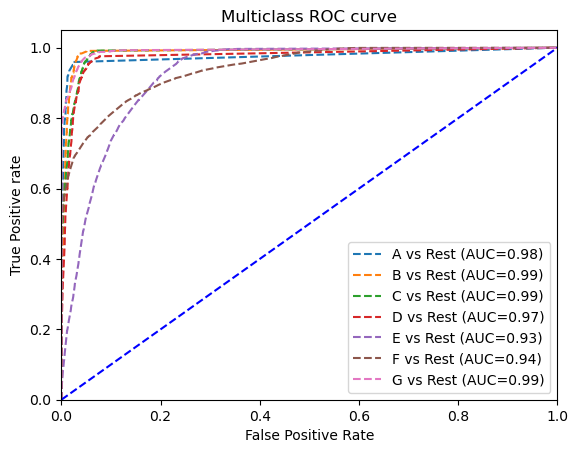

AdaBoost


C:\Users\tchar\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


---------------Score train et test -----------------------
score train: 0.34669832281655094
score test: 0.34274541668782693
-------------Matrice de confusion--------------------------
[[   44    48     7    16     8     0     0]
 [   98   193   196    42    16     5     0]
 [   95    85   762    77    52    14    28]
 [   88    60   432   135   111    62   102]
 [   54    18   161    43  4939    94   275]
 [    3     1    26     5 10182    27   239]
 [    0     0     0     0   178    21   649]]


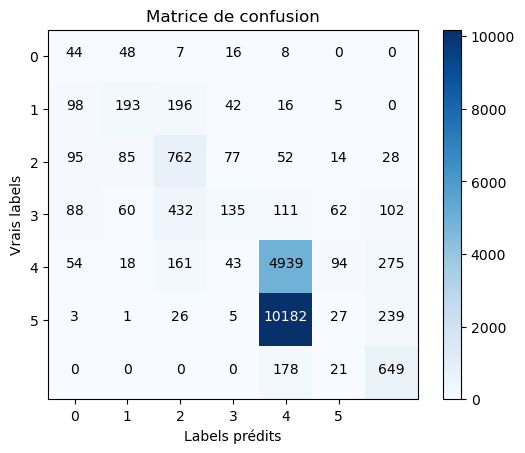

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.12      0.36      0.17       123
           1       0.48      0.35      0.40       550
           2       0.48      0.68      0.57      1113
           3       0.42      0.14      0.21       990
           4       0.32      0.88      0.47      5584
           5       0.12      0.00      0.01     10483
           6       0.50      0.77      0.61       848

    accuracy                           0.34     19691
   macro avg       0.35      0.45      0.35     19691
weighted avg       0.24      0.34      0.22     19691

---------------Courbe ROC multiclasse--------------------


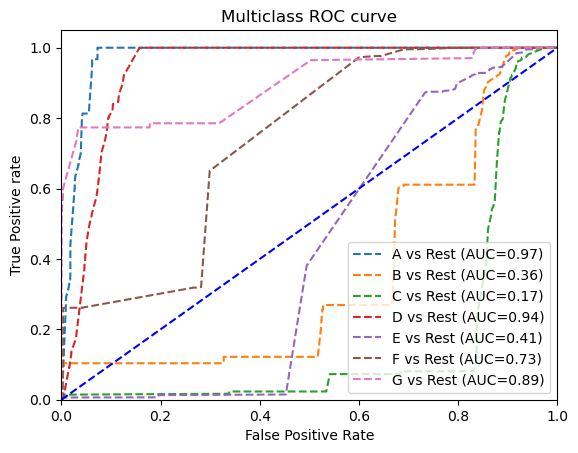

DecisionTreeClassifier
---------------Score train et test -----------------------
score train: 0.8440638370808629
score test: 0.8039205728505409
-------------Matrice de confusion--------------------------
[[  62   46   11    3    1    0    0]
 [  43  379  100   23    5    0    0]
 [   8  103  835  134   28    5    0]
 [   4   33  196  637  108   11    1]
 [   3    8   20  133 4249 1165    6]
 [   0    0    2    7 1442 9007   25]
 [   0    0    0    0   16  171  661]]


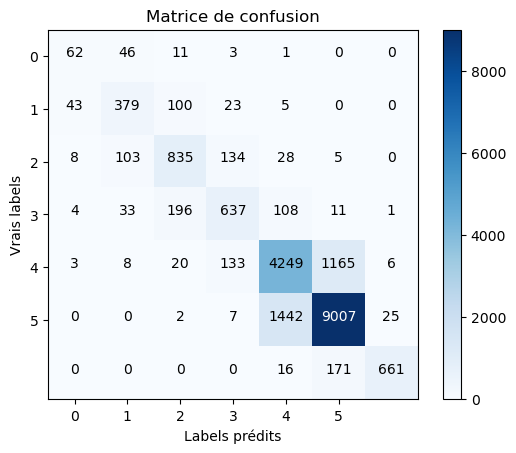

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       123
           1       0.67      0.69      0.68       550
           2       0.72      0.75      0.73      1113
           3       0.68      0.64      0.66       990
           4       0.73      0.76      0.74      5584
           5       0.87      0.86      0.86     10483
           6       0.95      0.78      0.86       848

    accuracy                           0.80     19691
   macro avg       0.73      0.71      0.72     19691
weighted avg       0.81      0.80      0.80     19691

---------------Courbe ROC multiclasse--------------------


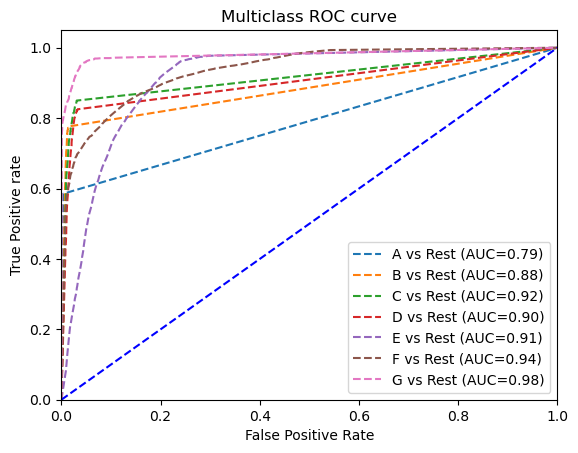

KNeighborsClassifier
---------------Score train et test -----------------------
score train: 0.8066477914756929
score test: 0.783911431618506
-------------Matrice de confusion--------------------------
[[  71   43    6    3    0    0    0]
 [  39  383  105   18    4    1    0]
 [  16  126  789  165   17    0    0]
 [   9   47  183  620  128    2    1]
 [   0   10   34  143 3914 1475    8]
 [   0    0   12    9 1414 9009   39]
 [   0    0    4    3   16  175  650]]


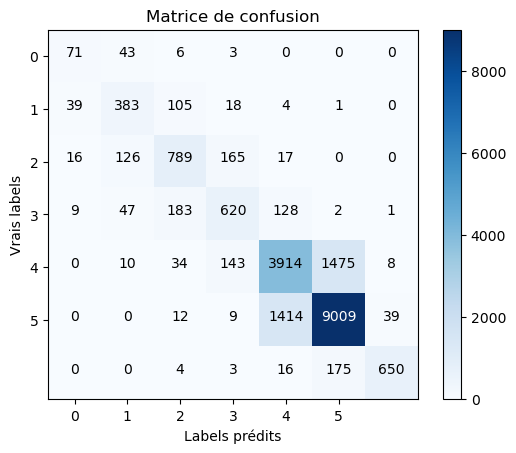

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       123
           1       0.63      0.70      0.66       550
           2       0.70      0.71      0.70      1113
           3       0.65      0.63      0.64       990
           4       0.71      0.70      0.71      5584
           5       0.84      0.86      0.85     10483
           6       0.93      0.77      0.84       848

    accuracy                           0.78     19691
   macro avg       0.71      0.71      0.71     19691
weighted avg       0.78      0.78      0.78     19691

---------------Courbe ROC multiclasse--------------------


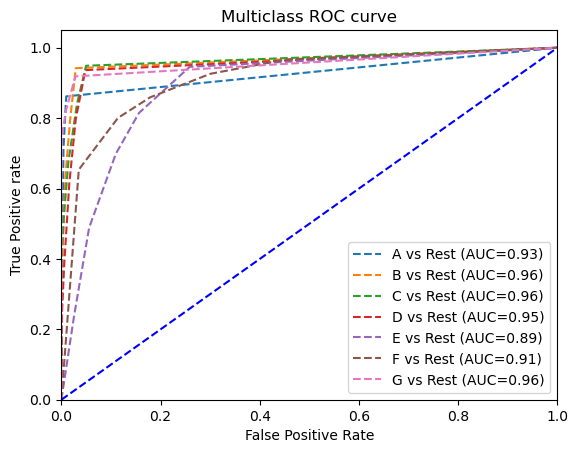

MLPClassifier


C:\Users\tchar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


---------------Score train et test -----------------------
score train: 0.8024453106153905
score test: 0.7857396780254938
-------------Matrice de confusion--------------------------
[[  56   52   11    4    0    0    0]
 [  19  387  111   27    6    0    0]
 [   3  106  773  184   43    4    0]
 [   3   39  185  634  112   14    3]
 [   0    6   21  192 4196 1152   17]
 [   0    0    5    7 1676 8774   21]
 [   0    0    0    3    7  186  652]]


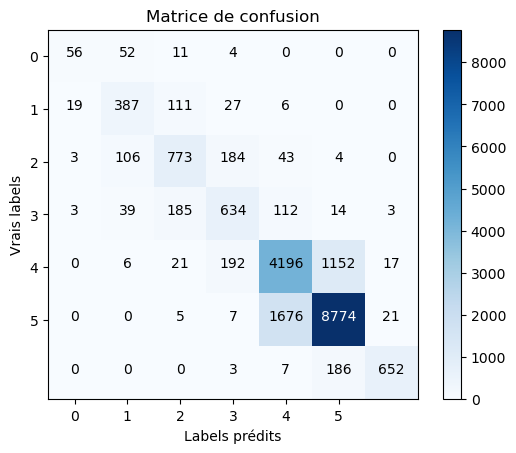

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.69      0.46      0.55       123
           1       0.66      0.70      0.68       550
           2       0.70      0.69      0.70      1113
           3       0.60      0.64      0.62       990
           4       0.69      0.75      0.72      5584
           5       0.87      0.84      0.85     10483
           6       0.94      0.77      0.85       848

    accuracy                           0.79     19691
   macro avg       0.74      0.69      0.71     19691
weighted avg       0.79      0.79      0.79     19691

---------------Courbe ROC multiclasse--------------------


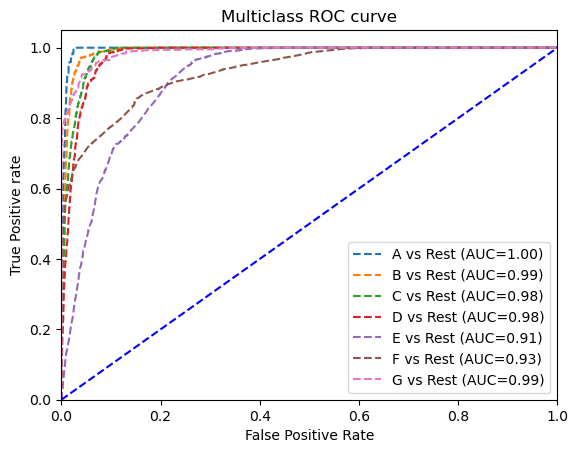

LogisticRegression


C:\Users\tchar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---------------Score train et test -----------------------
score train: 0.7520917181925524
score test: 0.7456198263165913
-------------Matrice de confusion--------------------------
[[  45   57   20    0    0    1    0]
 [  22  320  154   47    5    1    1]
 [   1  139  738  174   49   10    2]
 [   1   50  336  426  161   14    2]
 [   0    5   84  200 3682 1587   26]
 [   0    0    1   16 1539 8892   35]
 [   0    0    0    9   45  215  579]]


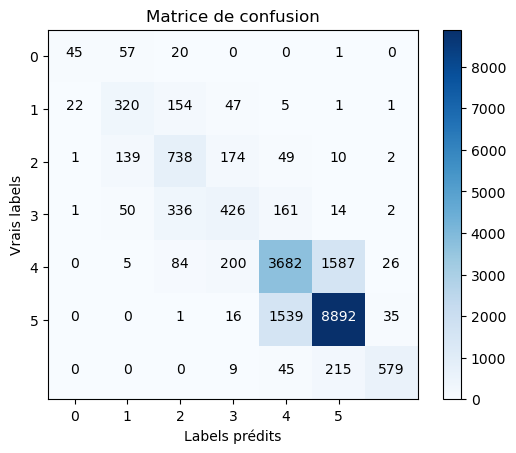

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.65      0.37      0.47       123
           1       0.56      0.58      0.57       550
           2       0.55      0.66      0.60      1113
           3       0.49      0.43      0.46       990
           4       0.67      0.66      0.67      5584
           5       0.83      0.85      0.84     10483
           6       0.90      0.68      0.78       848

    accuracy                           0.75     19691
   macro avg       0.66      0.60      0.63     19691
weighted avg       0.75      0.75      0.74     19691

---------------Courbe ROC multiclasse--------------------


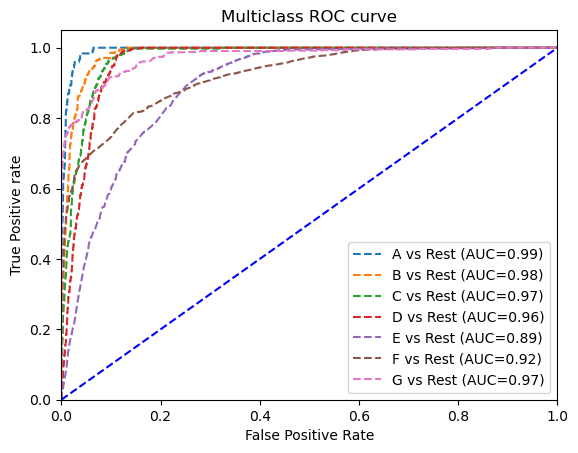

In [210]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

### 4.4 Optimisation des deux Modèles

##### Après optimisation des modèles RandomForest et KNeighborsClassifier, nous constatons que le score du RandomFrorest n'a pas bondit alors que celui du KNeighborsClassifier est passé de 78.39% à 79.6% sur les échantillons de test.  

#### 4.4.1 Recherche des meilleurs parametres du RandomFrorest avec RandomizedSearchCV

In [220]:
# recherche des meilleurs parametres du modèle
rf_params = {'n_estimators': [100, 200, 300, 400, 500], 
             'criterion': ['gini', 'entropy','log_loss'],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'max_features': [None, 'sqrt', 'log2']
            }

# Instanciation de la grid

grid_rfc = RandomizedSearchCV(RandomForest, param_distributions=rf_params, n_iter=100, cv=5, random_state=42) 

grid_rfc.fit(X_train, y_train) # entrainement de notre grid

print('best params :', grid_rfc.best_params_) # on affiche les meilleurs hyper parametres

best params : {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'log_loss'}


#### 4.4.2 Recherche des meilleurs parametres du KNN avec RandomizedSearchCV

In [221]:
# recherche des meilleurs parametres du modèle
hyper_params_knnc = {'n_neighbors': randint(1, 15),
                     'weights': ['uniform', 'distance'],
                     'algorithm': ['ball_tree', 'kd_tree', 'brute']
                    }

# Instanciation de la grid
grid_knnc = RandomizedSearchCV(KNeighborsClassifier, hyper_params_knnc, n_iter = 100, cv=5, random_state=42) 

grid_knnc.fit(X_train, y_train) # entrainement de notre grid

print('best params :', grid_knnc.best_params_) # on affiche les meilleurs hyper parametres

#evaluation_grid(grid_knnr.best_estimator_)

best params : {'algorithm': 'kd_tree', 'n_neighbors': 9, 'weights': 'distance'}


#### 4.4.3 Evaluation des deux modèles avec les hyperparamètres

In [222]:
dict_of_grids = {'grid_rfc': grid_rfc.best_estimator_,
                 'grid_knnc': grid_knnc.best_estimator_
                 }

grid_rfc
---------------Score train et test -----------------------
score train: 0.8415753589883574
score test: 0.8082372657559291
-------------Matrice de confusion--------------------------
[[  59   51   10    3    0    0    0]
 [  20  406  103   17    4    0    0]
 [   3  103  850  132   22    3    0]
 [   4   24  199  651  105    7    0]
 [   0    5   18  133 4280 1142    6]
 [   0    0    3    4 1448 9012   16]
 [   0    0    0    0   11  180  657]]


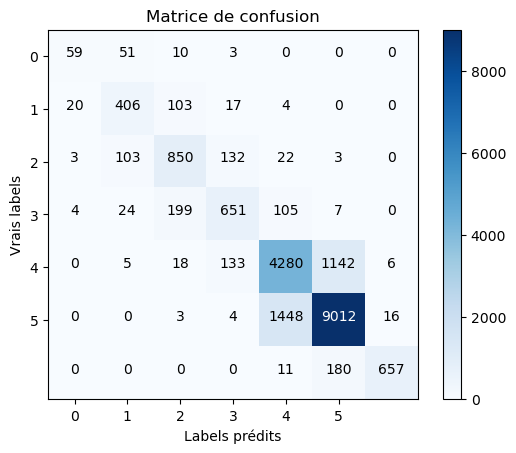

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.69      0.48      0.56       123
           1       0.69      0.74      0.71       550
           2       0.72      0.76      0.74      1113
           3       0.69      0.66      0.67       990
           4       0.73      0.77      0.75      5584
           5       0.87      0.86      0.87     10483
           6       0.97      0.77      0.86       848

    accuracy                           0.81     19691
   macro avg       0.76      0.72      0.74     19691
weighted avg       0.81      0.81      0.81     19691

---------------Courbe ROC multiclasse--------------------


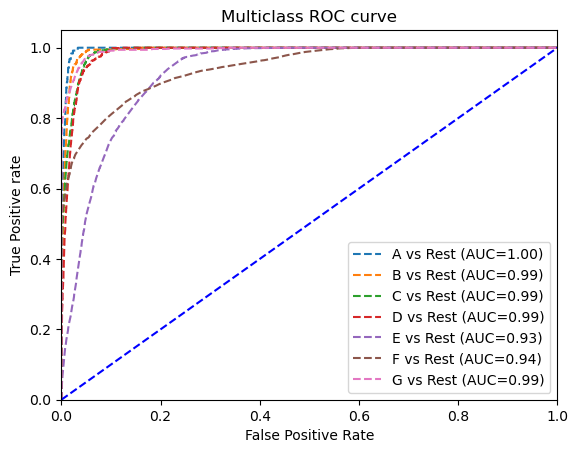

grid_knnc
---------------Score train et test -----------------------
score train: 0.8326117593286188
score test: 0.795693464019095
-------------Matrice de confusion--------------------------
[[  66   47    6    3    1    0    0]
 [  37  389  104   17    3    0    0]
 [   8  104  829  149   20    3    0]
 [   4   30  187  657  103    8    1]
 [   0    7   19  132 4345 1076    5]
 [   0    0    3    4 1732 8712   32]
 [   0    0    0    1   12  165  670]]


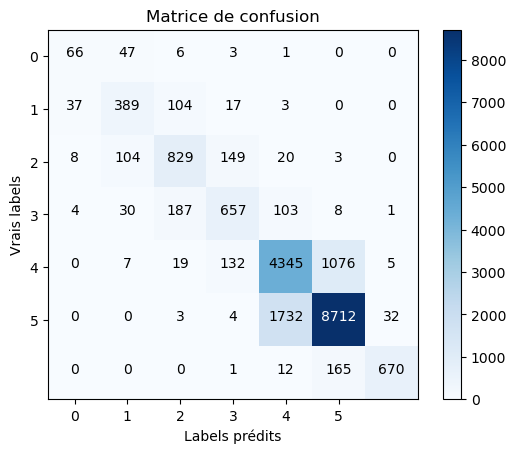

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.57      0.54      0.55       123
           1       0.67      0.71      0.69       550
           2       0.72      0.74      0.73      1113
           3       0.68      0.66      0.67       990
           4       0.70      0.78      0.74      5584
           5       0.87      0.83      0.85     10483
           6       0.95      0.79      0.86       848

    accuracy                           0.80     19691
   macro avg       0.74      0.72      0.73     19691
weighted avg       0.80      0.80      0.80     19691

---------------Courbe ROC multiclasse--------------------


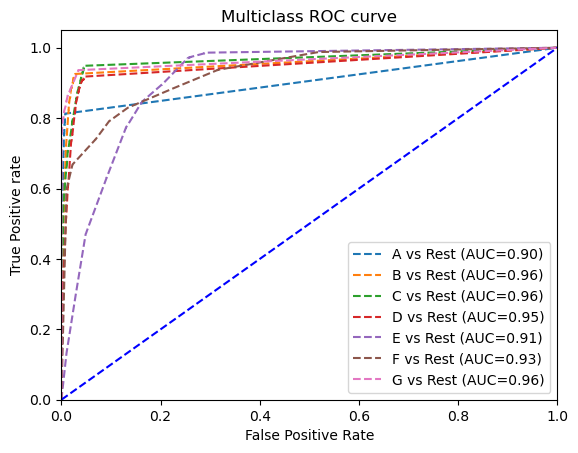

In [223]:
for name, grid in dict_of_grids.items():
    print(name)
    evaluation(grid)

### 4.5 Utilisation de techniques d'ensemble learning : Bagging & Boosting

##### L'idée du **bagging**, c'est de créer plusieurs entités d'un même modèle (par exemple plusieurs arbres de décision) et d'entrainer chacune de ces entités sur une portion aléatoire de notre dataset. Pour ça, on utilise une technique d'échantillonnage appélé bootstrapping et qui consiste à replacer après chaque tirage au sort les données qui ont été selectionnées dans notre dataset. De cette manière, on obtient une foule de modèle diversifiée puisqu'ils n'ont pas été tous nourris d'un même donnée mais qui partagent quand même certaines connaissances en commun et ça, c'est très important pour obtenir des majorités en faveur des bonnes reponses. Une fois qu'on à cette foule, on peut donc regrouper les resultats de chaque modèle pour faire notre prédiction finale. Voilà donc en quelques mots ce qui est le bagging. Et l'exemple d'algorithme le plus connu est celui de << Random Forest >> que nous avons déjà utilisé et optimisé avec un nombre d'estimateur de 100. Dans l'optimisation de nos modèles nous avons constaté que le RendomForest et le KNN donnaient de très bon scores. Nous testerons le modèle KNN comme base lors du bagging.

##### Une autre manière d'obtenir des ensembles de modèles qui soient diversifiés est d'utiliser une technique appélée **Boosting**. Cette fois ci, l'idée est d'entrainer l'un après l'autre, plusieurs modèle relativement faibles en demandant à chaque modèle d'essayer de corriger les erreurs effectuées par son prédécesseur. Du coup, on obtient un ensemble de modèle parfaitement complementaires dans lequel les faiblesses des uns sont compensées par les forces des autres et pour faire ça, il existe deux grands algorithmes qui sont << AdaBoost >> et << Grandient Boosting >>. Nous avons déjà testé le modèle Adaboost avec un score de 34% sur les echantillons de test. Dans cette partie d'optimisation nous utiliserons l'algorithme << Grandient Boosting >>.

##### **En résumé**: Dans le but d'optimiser encore nos modèles, nous utilisons dans cette partie les modèles d'ensemble learning (Bagging et Boosting) avec KNN et Adaboost comme modèle d'ensemble. Dans le cas du Bagging avec le modèle KNN, nous avons un score nettement superieur que ce que nous avons obtenu par optimisation des paramètres. Dans le cadre du Boosting, nous avons utiliser comme modèle GradientBoosting comme estimateur avec un score de 80.4% sur les echantillons de test. Ce score reste un très bon score puisquil est pratiquement égale aux scores de test obtenu avec les modèle RandomForest (80.78%), DecisionTreeClassifier (80.39%) et KNN() score de 80% obtenus avec RandomForest, KNN (80.2) avec le bagging.

#### 4.5.1 Bagging

---------------Score train et test -----------------------
score train: 0.8257811408910275
score test: 0.8023970341780509
-------------Matrice de confusion--------------------------
[[  60   51    9    3    0    0    0]
 [  22  389  113   20    6    0    0]
 [   6  105  822  151   26    3    0]
 [   6   38  186  635  117    6    2]
 [   0    9   22  145 4261 1139    8]
 [   0    0    6    5 1460 8979   33]
 [   0    0    0    2   14  178  654]]


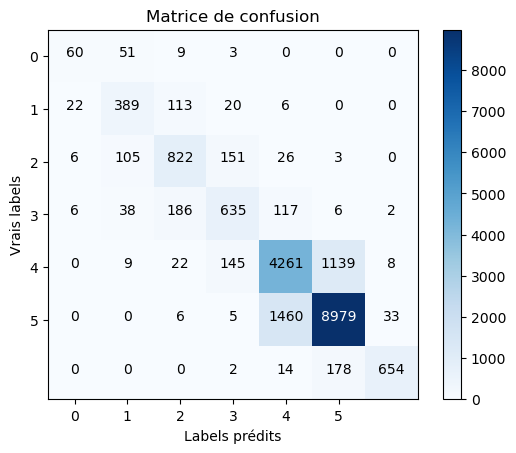

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.64      0.49      0.55       123
           1       0.66      0.71      0.68       550
           2       0.71      0.74      0.72      1113
           3       0.66      0.64      0.65       990
           4       0.72      0.76      0.74      5584
           5       0.87      0.86      0.86     10483
           6       0.94      0.77      0.85       848

    accuracy                           0.80     19691
   macro avg       0.74      0.71      0.72     19691
weighted avg       0.81      0.80      0.80     19691

---------------Courbe ROC multiclasse--------------------


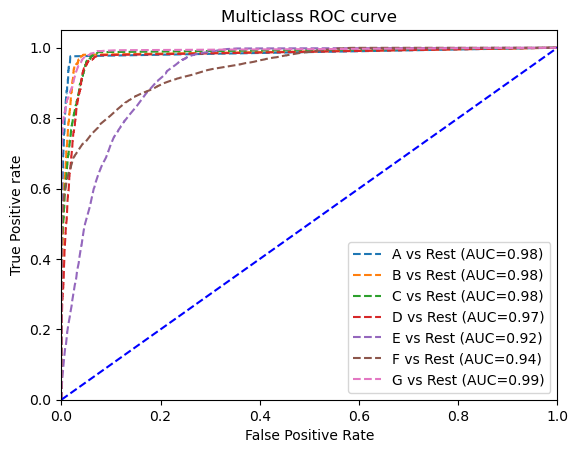

In [230]:
Bagg_KnnC = BaggingClassifier(estimator = KNeighborsClassifier, n_estimators=200, random_state=42)
evaluation(Bagg_KnnC)

#### 4.5.2 Boosting

---------------Score train et test -----------------------
score train: 0.8321546919238729
score test: 0.8045299883195368
-------------Matrice de confusion--------------------------
[[  62   48   12    1    0    0    0]
 [  23  402   95   26    4    0    0]
 [  10   89  843  140   28    3    0]
 [   5   23  203  633  113   10    3]
 [   0    8   34  137 4267 1132    6]
 [   0    0    3    4 1480 8974   22]
 [   0    0    0    0   10  177  661]]


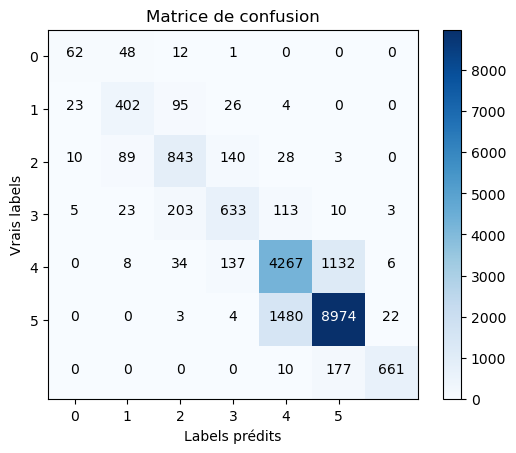

---------------Rapport de classification--------------------
              precision    recall  f1-score   support

           0       0.62      0.50      0.56       123
           1       0.71      0.73      0.72       550
           2       0.71      0.76      0.73      1113
           3       0.67      0.64      0.66       990
           4       0.72      0.76      0.74      5584
           5       0.87      0.86      0.86     10483
           6       0.96      0.78      0.86       848

    accuracy                           0.80     19691
   macro avg       0.75      0.72      0.73     19691
weighted avg       0.81      0.80      0.81     19691

---------------Courbe ROC multiclasse--------------------


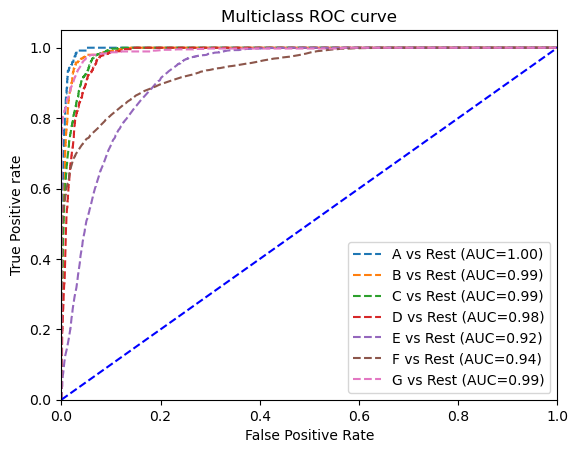

In [232]:
Boost_GbC = GradientBoostingClassifier(n_estimators=2000, random_state=42)
evaluation(Boost_GbC)

### 4.6 Interpratabilité - Features importances

##### Dans cette partie il s'agit de connaitre les variables qui on plus d'influence sur les modèles. Nous avons choisi les modèles qui ont de bon score et qui sont stables sur les données de train et de test. il s'agit des modèles RandomFroest, l'arbre de décision et GradientBoosting. nous constatons que dans l'ensemble, les trois modèles accordent à la carosserie, à la masse vide, à la boite de vitesse, au carburant.

##### Cette partie peut être également utiliser pour faire de la selection de variables soit en négligeant à partir d'un certain seuil des variables. Mais, nous preferons laisser notre modèle dans le but de conserver nos 8 features dans le modèle.

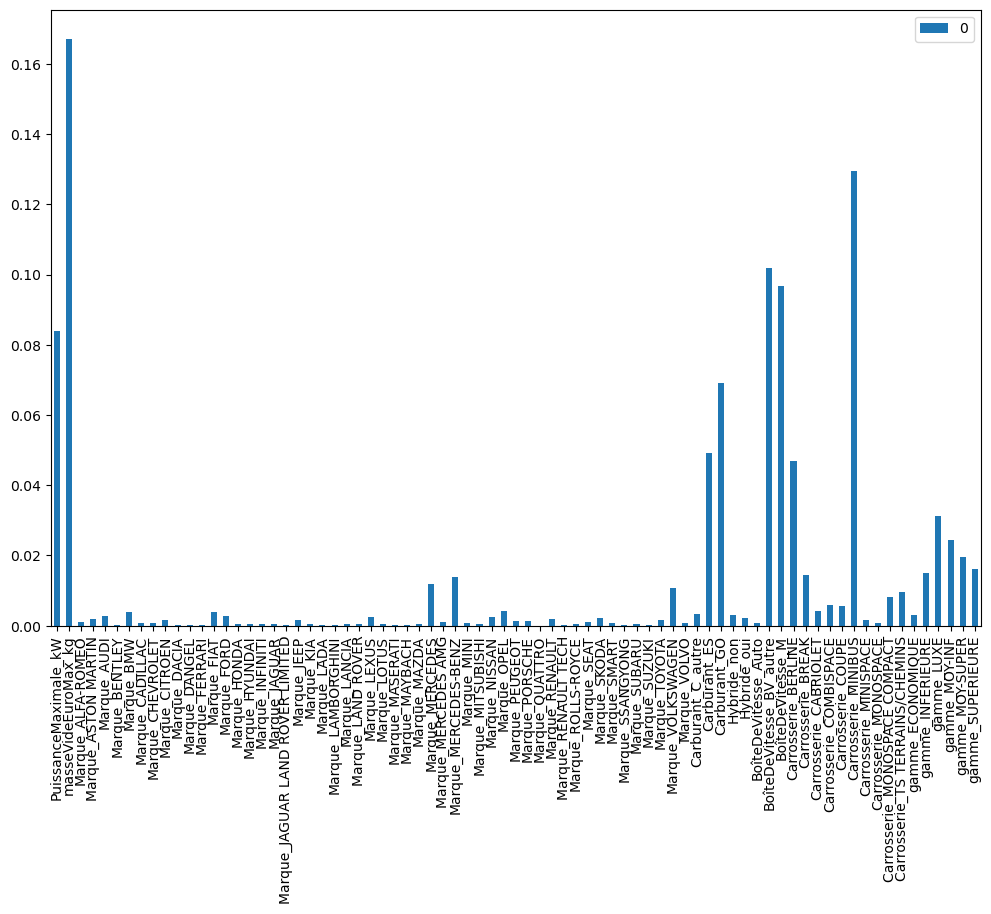

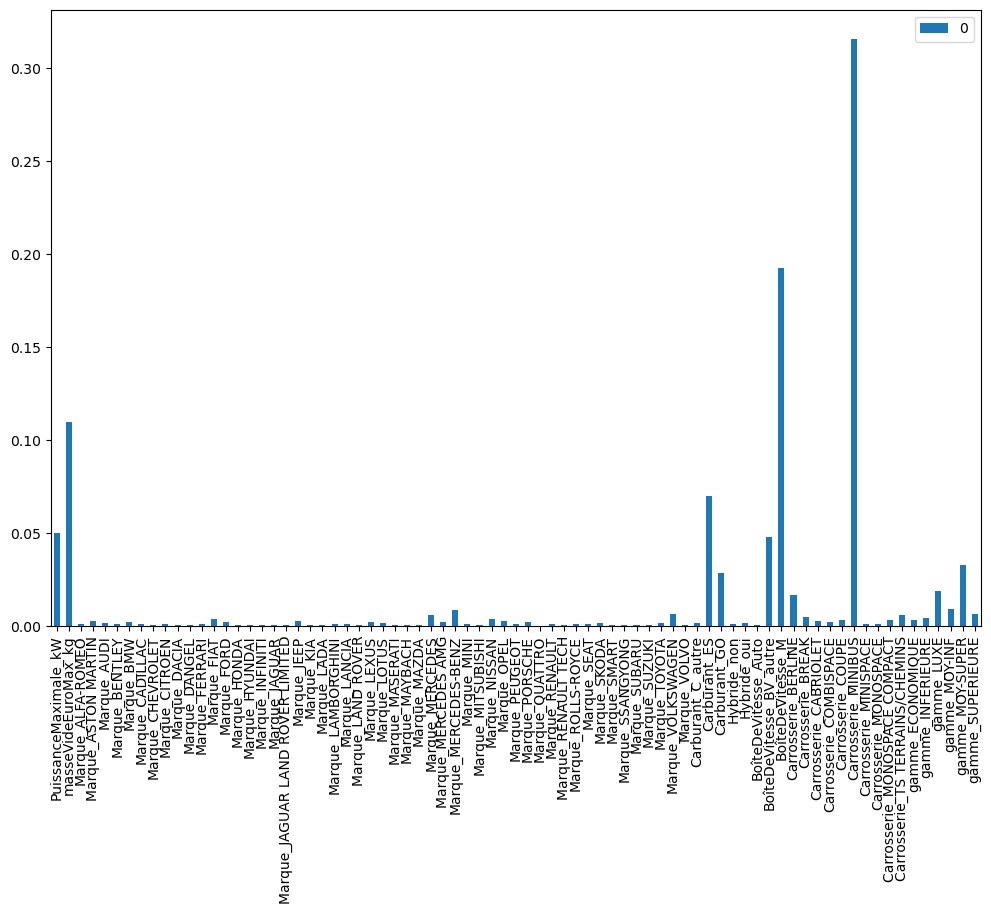

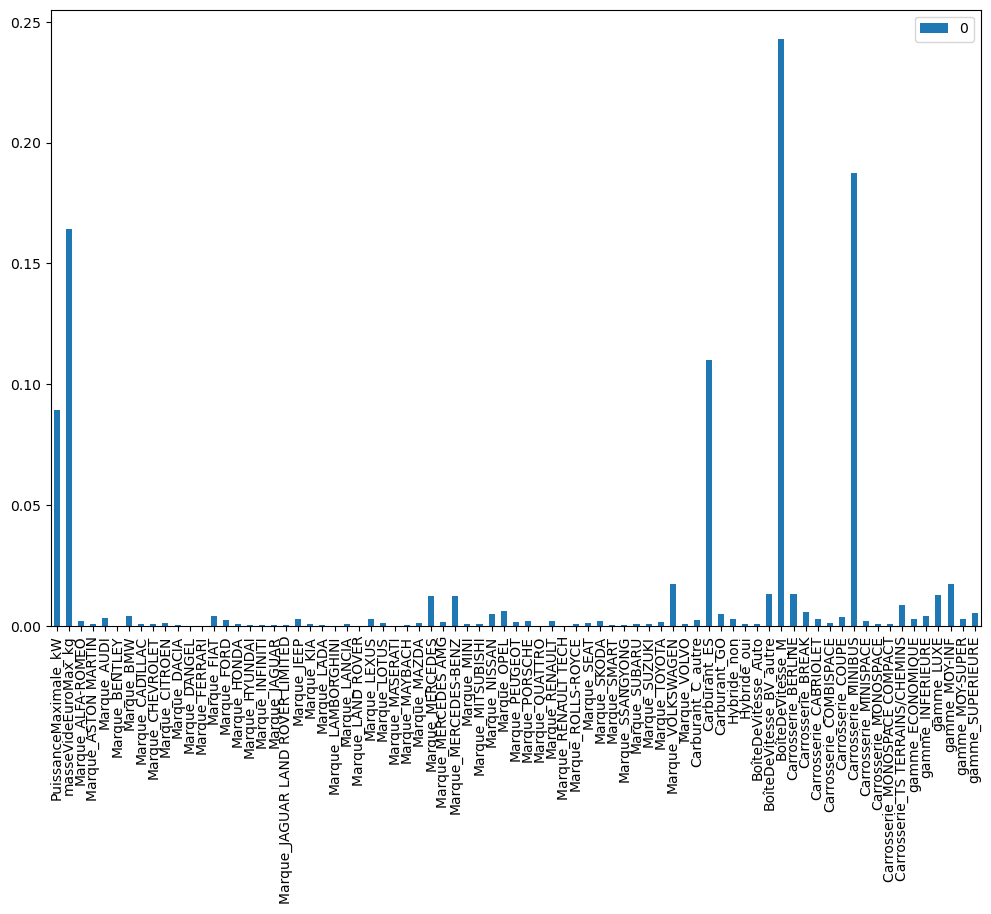

In [234]:
dict_of_Features = {'grid_rfc': grid_rfc.best_estimator_,
                    'Boost_GbC': Boost_GbC,
                    'DecisionTreeClassifier': DecisionTreeClassifier
                   }

for name, feature in dict_of_Features.items():
    #pd.DataFrame(feature.feature_importances_, index=X_train.columns)
    pd.DataFrame(feature.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

In [235]:
pd.DataFrame(grid_rfc.best_estimator_.feature_importances_, index=X_train.columns) # RandomForest optimisé

,0
PuissanceMaximale_kW,0.083918
masseVideEuroMax_kg,0.167129
Marque_ALFA-ROMEO,0.001108
Marque_ASTON MARTIN,0.001798
Marque_AUDI,0.002870
Marque_BENTLEY,0.000317
Marque_BMW,0.003923
Marque_CADILLAC,0.000653
Marque_CHEVROLET,0.000706
Marque_CITROEN,0.001497


In [236]:
pd.DataFrame(Boost_GbC.feature_importances_, index=X_train.columns) # Grdient Boosting

,0
PuissanceMaximale_kW,0.049813
masseVideEuroMax_kg,0.109590
Marque_ALFA-ROMEO,0.000716
Marque_ASTON MARTIN,0.002502
Marque_AUDI,0.001528
Marque_BENTLEY,0.000898
Marque_BMW,0.002186
Marque_CADILLAC,0.000957
Marque_CHEVROLET,0.000492
Marque_CITROEN,0.000904


In [237]:
pd.DataFrame(DecisionTreeClassifier.feature_importances_, index=X_train.columns) # DecisionTreeClassifier

,0
PuissanceMaximale_kW,0.089358
masseVideEuroMax_kg,0.164107
Marque_ALFA-ROMEO,0.001867
Marque_ASTON MARTIN,0.000495
Marque_AUDI,0.003005
Marque_BENTLEY,0.000063
Marque_BMW,0.003848
Marque_CADILLAC,0.000670
Marque_CHEVROLET,0.000888
Marque_CITROEN,0.001270
